In [78]:
library(lmtest)
library(ggpubr)
library(car)

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

In [74]:
beneficios <- c(2233,2698,887,1530,2365,2423,563,1349,1262,274,218,2519,1564,1953,2006,1870,1194,2861,1123,1514)
uno <- c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)
materia <- c(7256,8822,2759,4947,7726,7945,1465,4222,4025,643,358,8082,5065,6215,6265,5986,3603,9102,3379,4873)
trabajadores <- c(1,6,5,8,2,5,8,6,1,4,1,7,7,5,7,4,5,8,1,7)
X <- cbind(uno,materia,trabajadores)
Y <- beneficios
data <- cbind(Y,X)
data

Y,uno,materia,trabajadores
2233,1,7256,1
2698,1,8822,6
887,1,2759,5
1530,1,4947,8
2365,1,7726,2
2423,1,7945,5
563,1,1465,8
1349,1,4222,6
1262,1,4025,1
274,1,643,4


In [31]:
B <- solve(t(X)%*% X) %*% t(X) %*% Y
t(B)

uno,materia,trabajadores
84.48433,0.2965394,2.555623


In [32]:
modelo <- lm(Y ~ materia + trabajadores)
summary(modelo)


Call:
lm(formula = Y ~ materia + trabajadores)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.910 -21.062  -4.268  23.930  56.969 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  84.484331  19.068166   4.431 0.000366 ***
materia       0.296539   0.002793 106.169  < 2e-16 ***
trabajadores  2.555623   2.909667   0.878 0.392014    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31 on 17 degrees of freedom
Multiple R-squared:  0.9986,	Adjusted R-squared:  0.9984 
F-statistic:  5970 on 2 and 17 DF,  p-value: < 2.2e-16


In [33]:
s2 <- (t(Y - X %*% B) %*% (Y- X %*% B) )/ 17
s <- sqrt(s2)
s

31.00264


In [34]:
x_ <- c(1,2500,3)
ygorro<-x_ %*% B
ic1 <- ygorro - qt(0.975, 17) * s * sqrt (1+ t(x_) %*% solve(t(X) %*% X) %*% x_)
ic2 <- ygorro + qt(0.975, 17) * s * sqrt (1+ t(x_) %*% solve(t(X) %*% X) %*% x_)
ic1 
ic2

764.3119


902.6874


In [35]:
P <- X %*% solve(t(X)%*% X) %*%t(X)
P

0.252394526,0.098887279,-0.01268357,-0.07389767,0.225572915,0.11563813,-0.16005582,-0.014934518,0.172447086,-0.02659037,0.0817113192,0.04212559,-0.0325266653,0.07283124,-0.002834023,0.10561613,0.008200257,0.02891310,0.156462547,-0.037277488
0.098887279,0.155198898,-0.01580841,0.05266249,0.114505930,0.12827269,-0.04407688,0.027398465,0.009121365,-0.07715739,-0.0927578064,0.13720048,0.0533800645,0.08020861,0.086719308,0.07128559,0.007640190,0.16809962,-0.008826261,0.048045785
-0.012683568,-0.015808411,0.09690261,0.07069151,-0.016365181,-0.00419278,0.13856928,0.073863547,0.050301235,0.13267119,0.1217853814,0.00409760,0.0629107082,0.02953167,0.039518023,0.02851526,0.080449752,-0.01030566,0.062894297,0.066653538
-0.073897671,0.052662487,0.07069151,0.13721737,-0.049767572,0.03160029,0.16346412,0.087336538,-0.049542919,0.05896869,-0.0219016706,0.08591337,0.1086550230,0.04464075,0.099609618,0.01869403,0.064329577,0.10589766,-0.044673476,0.110102288
0.225572915,0.114505930,-0.01636518,-0.04976757,0.207534211,0.12170854,-0.14247345,-0.007965936,0.139549741,-0.04215011,0.0419183637,0.06425180,-0.0160737690,0.07564846,0.015875414,0.10010363,0.006105744,0.06085647,0.122350431,-0.021185638
0.115638135,0.128272686,-0.00419278,0.03160029,0.121708536,0.11300458,-0.04708872,0.024318226,0.042621426,-0.04746080,-0.0402483580,0.10699854,0.0388179783,0.07390866,0.065936533,0.07328457,0.014880604,0.12549828,0.028022604,0.034479009
-0.160055822,-0.044076885,0.13856928,0.16346412,-0.142473450,-0.04708872,0.28811918,0.120602409,-0.044386518,0.17991346,0.0868915189,0.01682330,0.1248314375,0.01484502,0.081871622,-0.01136512,0.108354214,0.01471576,-0.021259817,0.131705008
-0.014934518,0.027398465,0.07386355,0.08733654,-0.007965936,0.02431823,0.12060241,0.071345336,0.015933383,0.08262030,0.0509666828,0.04592698,0.0747503995,0.04084607,0.063285998,0.03157506,0.065800252,0.04764105,0.022105052,0.076584704
0.172447086,0.009121365,0.05030124,-0.04954292,0.139549741,0.04262143,-0.04438652,0.015933383,0.177231788,0.08563610,0.1826621507,-0.02198412,-0.0175163278,0.04518334,-0.019293376,0.07772379,0.049051378,-0.05569595,0.178188432,-0.017232000
-0.026590365,-0.077157392,0.13267119,0.05896869,-0.042150106,-0.04746080,0.17991346,0.082620303,0.085636098,0.20540355,0.2130067086,-0.05068865,0.0541046753,0.01262951,0.012423537,0.01981829,0.103355452,-0.08535225,0.108074444,0.060773657
0.081711319,-0.092757806,0.12178538,-0.02190167,0.041918364,-0.04024836,0.08689152,0.050966683,0.182662151,0.21300671,0.2972355642,-0.09474497,-0.0004804541,0.01380455,-0.037973799,0.04606759,0.095415062,-0.15172238,0.202846068,0.005518481


In [82]:
Ygorro <-X %*% B
ei <-Y - Ygorro
summary(modelo)


Call:
lm(formula = Y ~ materia + trabajadores)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.910 -21.062  -4.268  23.930  56.969 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  84.484331  19.068166   4.431 0.000366 ***
materia       0.296539   0.002793 106.169  < 2e-16 ***
trabajadores  2.555623   2.909667   0.878 0.392014    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31 on 17 degrees of freedom
Multiple R-squared:  0.9986,	Adjusted R-squared:  0.9984 
F-statistic:  5970 on 2 and 17 DF,  p-value: < 2.2e-16


In [83]:
cor(X) #chequeo de correlación para evitar colinealidad, si la correlación entre dos variables explicativas es muy alta, hay colinealidad

Warning message in cor(X):
"the standard deviation is zero"

,uno,materia,trabajadores
uno,1,NA,NA
materia,NA,1.0000000,0.2287726
trabajadores,NA,0.2287726,1.0000000


In [86]:
bptest(modelo) #H0 Los errores tienen varianza constante
#TEST DE WHITE
#si el valor p es menor a alpha se rechaza H0 


	studentized Breusch-Pagan test

data:  modelo
BP = 5.139, df = 2, p-value = 0.07657


In [87]:
dwtest(modelo,alternative ="two.sided",iterations=1000) #Test para chequear problemas de autocorrelación
#el valor DW de este test se contraste con los valores en la tabla del profe


	Durbin-Watson test

data:  modelo
DW = 1.4011, p-value = 0.1765
alternative hypothesis: true autocorrelation is not 0


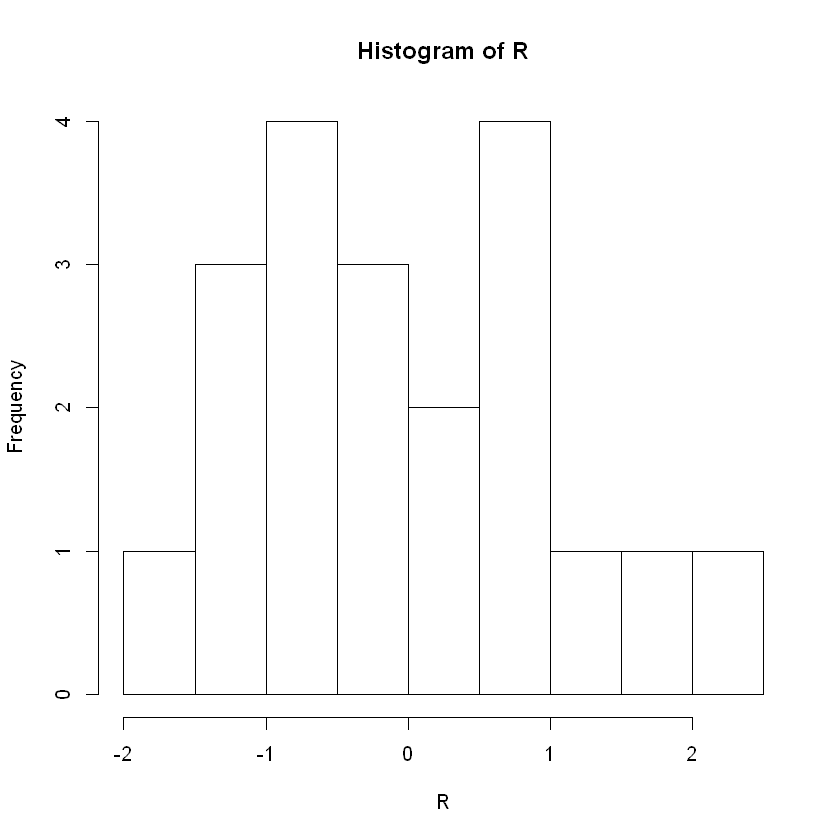

In [85]:
R<-rstudent(modelo) #para el supuesto de normalidad se sacan los residuos studentizados, y se chequean pruebas de normalidad
hist(R)

In [88]:
ks.test(ri, "pnorm", mean(ri), sd(ri))



	One-sample Kolmogorov-Smirnov test

data:  ri
D = 0.11337, p-value = 0.934
alternative hypothesis: two-sided


In [89]:
shapiro.test(R)


	Shapiro-Wilk normality test

data:  R
W = 0.95901, p-value = 0.5242


[1] 18 15

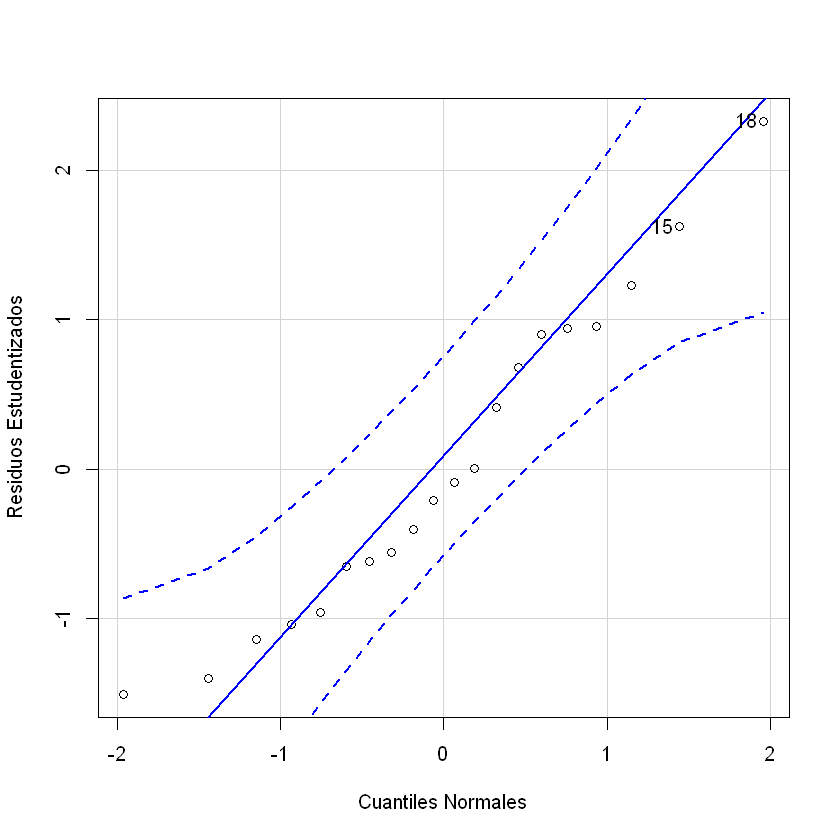

In [79]:
qqPlot(R, xlab="Cuantiles Normales", ylab="Residuos Estudentizados")